## Final Project Submission

Please fill out:
* Student name: Kanwal Arora
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Eli
* Blog post URL:


In [2]:
#!pip install tmdbsimple
#!pip install missingno

In [2]:
# Your code here - remember to use markdown cells for comments as well!
!ls zippedData

bom.movie_gross.csv       imdb.title.crew.csv       rt.movie_info.tsv
imdb.name.basics.csv      imdb.title.principals.csv rt.reviews.tsv
imdb.title.akas.csv       imdb.title.ratings 2.csv  tmdb.movies.csv
imdb.title.basics.csv     imdb.title.ratings.csv    tn.movie_budgets.csv


In [3]:
# Getting information from movie info tsv file

import pandas as pd
df_rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv',sep='\t')
print(df_rt_movies.shape)
df_rt_movies.head()

(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
# Extracting information from Reviews Tsv File
df_rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv',sep='\t' ,encoding='latin-1')
# Data encoded from utf-8 to latin-1
print(df_rt_reviews.shape)
df_rt_reviews.head()

(54432, 8)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [50]:
# Extracting information from IMDB Title Basics Csv File
df_imdb_basics = pd.read_csv('zippedData/imdb.title.basics.csv')
print(df_imdb_basics.shape)
df_imdb_basics.head()

(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [51]:
# Extracting information from IMDB Title AKAS Csv File
df_imdb_akas = pd.read_csv('zippedData/imdb.title.akas.csv')
print(df_imdb_akas.shape)
df_imdb_akas.head()

(331703, 8)


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [52]:
# Extracting information from IMDB Name Basics Csv File
df_imdb_basics_names = pd.read_csv('zippedData/imdb.name.basics.csv')
print(df_imdb_basics.shape)
df_imdb_basics.head()

(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
# Extracting information from IMDB Title Crew Csv File
df_imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv')
print(df_imdb_crew.shape)
df_imdb_crew.head()

(146144, 3)


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [14]:
# Extracting information from IMDB Title Principals Csv File
df_imdb_pcpals = pd.read_csv('zippedData/imdb.title.principals.csv')
print(df_imdb_pcpals.shape)
df_imdb_pcpals.head()

(1028186, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [15]:
# Extracting information from IMDB Title Ratings Csv File
df_imdb_ratings =  pd.read_csv('zippedData/imdb.title.ratings.csv')
print(df_imdb_ratings.shape)
df_imdb_ratings.head()

(73856, 3)


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
# Extracting information from BOM Movie Gross Csv File
df_bom =  pd.read_csv('zippedData/bom.movie_gross.csv')
print(df_bom.shape)
df_bom.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# Extracting information from TMDB Movie Csv File
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv')
print(df_tmdb.shape)
df_tmdb.head()

(26517, 10)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [65]:
# Extracting information from TMDB Movie Csv File
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
print(df_budgets.shape)
df_budgets.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# The question is: what type of films are currently doing the best at the box office?
1. indicator of how good a movie is doing = earnings - cost  or earning/cost
2. parameters describing type of movie? 
actor, director, writer, reviews, genre?

Data I need to gather: movie identifier - earnings - cost - actor? - director? - writer? - reviews ?- genre?

Starting with the tn.movie_budgets for earnings and cost info and the imdb data for genre information

### Data cleaning

In [66]:
df1=df_budgets.copy(deep=True) # deep copy of df_budgets to preserve original dataset 
# Looking for Nan values
df1.isnull().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [68]:
# looking for duplicated movies
df1['movie'].duplicated().any()

True

In [69]:
# looking for duplicated movies
df1[df1['movie'].duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
273,74,"May 19, 1998",Godzilla,"$125,000,000","$136,314,294","$376,000,000"
408,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441"
484,85,"Jul 8, 2005",Fantastic Four,"$87,500,000","$154,696,080","$333,132,750"
543,44,"May 7, 1999",The Mummy,"$80,000,000","$155,385,488","$416,385,488"
707,8,"Jun 13, 1997",Hercules,"$70,000,000","$99,112,101","$250,700,000"
...,...,...,...,...,...,...
5668,69,"Nov 16, 1942",Cat People,"$134,000","$4,000,000","$8,000,000"
5676,77,"Oct 1, 1968",Night of the Living Dead,"$114,000","$12,087,064","$30,087,064"
5677,78,"Feb 8, 1915",The Birth of a Nation,"$110,000","$10,000,000","$11,000,000"
5699,100,"Aug 30, 1972",The Last House on the Left,"$87,000","$3,100,000","$3,100,000"


In [71]:
df1[df1['movie'] == 'Godzilla']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
140,41,"May 16, 2014",Godzilla,"$160,000,000","$200,676,069","$529,076,069"
273,74,"May 19, 1998",Godzilla,"$125,000,000","$136,314,294","$376,000,000"


In [72]:
df1[df1['movie'] == 'Robin Hood']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
38,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006"
408,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441"


In [73]:
df1[df1['movie'] == 'The Last House on the Left']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3043,44,"Mar 13, 2009",The Last House on the Left,"$15,000,000","$32,752,215","$46,526,243"
5699,100,"Aug 30, 1972",The Last House on the Left,"$87,000","$3,100,000","$3,100,000"


###  It seems like the combination of the movie and the release date gives a unique identifier to each movie. 
### With a unique identifier, I wil be able to join this data frame with others.
## Engineering of a new variable: 'movie_and_date' 

In [74]:
#make sure  'movie' is a string
df1=df1.astype({'movie':'str'})

type(df1['movie'][0])

str

In [75]:
# transform 'realease date' into a timestamp to make sure it is consistent.
df1['release_date'] = pd.to_datetime(df1['release_date'])

In [76]:
# check
df1.release_date[0]

Timestamp('2009-12-18 00:00:00')

In [77]:
type(df1.release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [78]:
# check
df1.index

RangeIndex(start=0, stop=5782, step=1)

In [81]:
# taking the first 4 digit (year) out of the timestamp
df1['release_year'] = [ str(df1['release_date'][x])[0:4]  for x in df1.index ]
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,2018
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",1999
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,2015


In [82]:
# concatenate movie and date
df1['movie_and_date'] = df1['movie'] + '_' + df1['release_year'] 

In [83]:
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,movie_and_date
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Avatar_2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,Pirates of the Caribbean: On Stranger Tides_2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Dark Phoenix_2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,Avengers: Age of Ultron_2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Star Wars Ep. VIII: The Last Jedi_2017


In [84]:
#check
df1['movie_and_date'][0]

'Avatar_2009'

In [85]:
# output to file. I will start over from this point in Analysis_Part3.ipynb
df1.to_csv('zippedData/DataFrame1.csv')

In [86]:
df1 = df1.set_index('movie_and_date')

In [62]:
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [55]:
# Starting from the imdb basics file
df2 = df_imdb_basics.copy(deep = True)  # deep copy of df_imdb_basics to preserve original dataset

In [56]:
# compare the 2 titles columns.
df2[ df2['primary_title'] != df2['original_title'] ]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History
13,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama
15,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History"
...,...,...,...,...,...,...
146026,tt9899938,Journey of the Sky Goddess,Kibaiyanse! Watashi,2019,116.0,"Comedy,Drama"
146028,tt9900060,Lupin the Third: Fujiko Mine's Lie,Lupin the IIIrd: Mine Fujiko no Uso,2019,NaN,"Adventure,Crime,Drama"
146037,tt9900688,Big Three Dragons,Da San Yuan,2019,111.0,Comedy
146121,tt9914254,A Cherry Tale,Kirsebæreventyret,2019,85.0,Documentary


In [57]:
print(type(df2['primary_title'][0]))
print(type(df2['start_year'][0]))

# changing start_year to a string format
df2= df2.astype({'start_year' : 'str'})

print(type(df2['primary_title'][0]))
print(type(df2['start_year'][0]))

<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>


In [58]:
df2.reset_index(inplace=True)
df2['movie_and_date'] = df2['primary_title'] + '_' + df2['start_year'] 
df2['movie_and_date'][0]

'Sunghursh_2013'

In [59]:
df2 = df2.set_index('movie_and_date')
df2

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres
movie_and_date,,,,,,,
Sunghursh_2013,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season_2019,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind_2018,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh_2018,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
The Wandering Soap Opera_2017,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
Kuambil Lagi Hatiku_2019,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
Rodolpho Teóphilo - O Legado de um Pioneiro_2015,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
Dankyavar Danka_2013,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


## Ready to join df1 (budget) and df2 (imdb_basics). Keep only the movies for which I have budget and imdb_basics info. So, inner join.

In [108]:
df3=df1.join(df2,how='inner')
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres
movie_and_date,,,,,,,,,,,,,,
#Horror_2015,16,2015-11-20,#Horror,"$1,500,000",$0,$0,2015,61037,tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror"
10 Cloverfield Lane_2016,54,2016-03-11,10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",2016,5761,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Strong_2018,64,2018-01-19,12 Strong,"$35,000,000","$45,819,713","$71,118,378",2018,7385,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
12 Years a Slave_2013,18,2013-10-18,12 Years a Slave,"$20,000,000","$56,671,993","$181,025,343",2013,25709,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zookeeper_2011,71,2011-07-08,Zookeeper,"$80,000,000","$80,360,866","$170,805,525",2011,5964,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance"
Zoolander 2_2016,64,2016-02-12,Zoolander 2,"$50,000,000","$28,848,693","$55,348,693",2016,10724,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy
Zootopia_2016,57,2016-03-04,Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",2016,49579,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy"


### At this point, we have 1547 movies with $ information and ability to join the imdb data based on the tconst column which is the imdb movie identifier.
### Let's use worldwide_gross / production_budget / movie_and_date to identify profitable movies

### Need to remove $ and , signs from worldwide_gross and production_budget

In [115]:
df3.astype({'production_budget':'str', 'domestic_gross':'str', 'worldwide_gross':'str',})

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,#Horror_2015,16,2015-11-20,#Horror,1500000,0,0,2015,61037,tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror"
1,10 Cloverfield Lane_2016,54,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,2016,5761,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
3,12 Strong_2018,64,2018-01-19,12 Strong,35000000,45819713,71118378,2018,7385,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
4,12 Years a Slave_2013,18,2013-10-18,12 Years a Slave,20000000,56671993,181025343,2013,25709,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,Zookeeper_2011,71,2011-07-08,Zookeeper,80000000,80360866,170805525,2011,5964,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance"
1543,Zoolander 2_2016,64,2016-02-12,Zoolander 2,50000000,28848693,55348693,2016,10724,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy
1544,Zootopia_2016,57,2016-03-04,Zootopia,150000000,341268248,1019429616,2016,49579,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy"
1545,Zulu_2013,82,2013-12-31,Zulu,16000000,0,1844228,2013,33517,tt2249221,Zulu,Zulu,2013,110.0,"Crime,Drama,Thriller"


In [110]:
df3.reset_index(inplace=True)
df3.index

RangeIndex(start=0, stop=1547, step=1)

In [116]:
df3

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,#Horror_2015,16,2015-11-20,#Horror,1500000,0,0,2015,61037,tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror"
1,10 Cloverfield Lane_2016,54,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,2016,5761,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
3,12 Strong_2018,64,2018-01-19,12 Strong,35000000,45819713,71118378,2018,7385,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
4,12 Years a Slave_2013,18,2013-10-18,12 Years a Slave,20000000,56671993,181025343,2013,25709,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,Zookeeper_2011,71,2011-07-08,Zookeeper,80000000,80360866,170805525,2011,5964,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance"
1543,Zoolander 2_2016,64,2016-02-12,Zoolander 2,50000000,28848693,55348693,2016,10724,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy
1544,Zootopia_2016,57,2016-03-04,Zootopia,150000000,341268248,1019429616,2016,49579,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy"
1545,Zulu_2013,82,2013-12-31,Zulu,16000000,0,1844228,2013,33517,tt2249221,Zulu,Zulu,2013,110.0,"Crime,Drama,Thriller"


In [118]:
# make the $ amounts integer
df3=df3.astype({'production_budget':'int', 'domestic_gross':'int', 'worldwide_gross':'int',})

In [119]:
df3

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,#Horror_2015,16,2015-11-20,#Horror,1500000,0,0,2015,61037,tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror"
1,10 Cloverfield Lane_2016,54,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,2016,5761,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
3,12 Strong_2018,64,2018-01-19,12 Strong,35000000,45819713,71118378,2018,7385,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
4,12 Years a Slave_2013,18,2013-10-18,12 Years a Slave,20000000,56671993,181025343,2013,25709,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,Zookeeper_2011,71,2011-07-08,Zookeeper,80000000,80360866,170805525,2011,5964,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance"
1543,Zoolander 2_2016,64,2016-02-12,Zoolander 2,50000000,28848693,55348693,2016,10724,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy
1544,Zootopia_2016,57,2016-03-04,Zootopia,150000000,341268248,1019429616,2016,49579,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy"
1545,Zulu_2013,82,2013-12-31,Zulu,16000000,0,1844228,2013,33517,tt2249221,Zulu,Zulu,2013,110.0,"Crime,Drama,Thriller"


In [120]:
df3=df3.loc[ (df3['production_budget']!=0) & (df3['domestic_gross']!=0) & (df3['worldwide_gross']!=0)]

In [121]:
df3

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,10 Cloverfield Lane_2016,54,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,2016,5761,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
3,12 Strong_2018,64,2018-01-19,12 Strong,35000000,45819713,71118378,2018,7385,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
4,12 Years a Slave_2013,18,2013-10-18,12 Years a Slave,20000000,56671993,181025343,2013,25709,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
5,127 Hours_2010,6,2010-11-05,127 Hours,18000000,18335230,60217171,2010,9126,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,Zero Dark Thirty_2012,66,2012-12-19,Zero Dark Thirty,52500000,95720716,134612435,2012,17751,tt1790885,Zero Dark Thirty,Zero Dark Thirty,2012,157.0,"Drama,Thriller"
1542,Zookeeper_2011,71,2011-07-08,Zookeeper,80000000,80360866,170805525,2011,5964,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance"
1543,Zoolander 2_2016,64,2016-02-12,Zoolander 2,50000000,28848693,55348693,2016,10724,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy
1544,Zootopia_2016,57,2016-03-04,Zootopia,150000000,341268248,1019429616,2016,49579,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy"


In [122]:
df4 = df3.copy()

In [123]:
df4

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,10 Cloverfield Lane_2016,54,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,2016,5761,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
3,12 Strong_2018,64,2018-01-19,12 Strong,35000000,45819713,71118378,2018,7385,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
4,12 Years a Slave_2013,18,2013-10-18,12 Years a Slave,20000000,56671993,181025343,2013,25709,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
5,127 Hours_2010,6,2010-11-05,127 Hours,18000000,18335230,60217171,2010,9126,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,Zero Dark Thirty_2012,66,2012-12-19,Zero Dark Thirty,52500000,95720716,134612435,2012,17751,tt1790885,Zero Dark Thirty,Zero Dark Thirty,2012,157.0,"Drama,Thriller"
1542,Zookeeper_2011,71,2011-07-08,Zookeeper,80000000,80360866,170805525,2011,5964,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance"
1543,Zoolander 2_2016,64,2016-02-12,Zoolander 2,50000000,28848693,55348693,2016,10724,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy
1544,Zootopia_2016,57,2016-03-04,Zootopia,150000000,341268248,1019429616,2016,49579,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy"


## Feature engineering: 'profit', 'profit_ratio' 
The goal is to create features telling us if a movie made money or not.

In [124]:
# subtract production budget from gross income 
df4['profit'] = df4['worldwide_gross']-df4['production_budget']
df4.head()

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,profit
1,10 Cloverfield Lane_2016,54,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,2016,5761,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",103286422
2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,-11985384
3,12 Strong_2018,64,2018-01-19,12 Strong,35000000,45819713,71118378,2018,7385,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",36118378
4,12 Years a Slave_2013,18,2013-10-18,12 Years a Slave,20000000,56671993,181025343,2013,25709,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History",161025343
5,127 Hours_2010,6,2010-11-05,127 Hours,18000000,18335230,60217171,2010,9126,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama",42217171


# Let's do some visualization of the $ data


In [127]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df4.sort_values(by = 'profit',inplace=True)
plt.figure(figsize =(22,20))
sns.barplot(x='movie_and_date',y='profit',data=df4)


plt.yticks([])
plt.title("movies' profit", fontsize=14)
plt.xlabel("movies ", fontsize=14)
plt.ylabel("profit", fontsize=14)

# Conclusion:
## Most movies have positive profit. It seems like the movie business is a good business to invest in.

## Let's now look at the profit in terms of a ratio between gross income and cost

In [142]:
df4['profit_ratio'] = df4['worldwide_gross']/df4['production_budget']
df4.sort_values(by = 'profit_ratio',inplace=True)
df4.head()

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,profit,profit_ratio
520,Higher Power_2018,67,2018-05-11,Higher Power,500000,528,528,2018,49123,tt2924392,Higher Power,Higher Power,2018,93.0,"Action,Sci-Fi,Thriller",-499472,0.001056
1198,The Ghastly Love of Johnny X_2012,74,2012-10-26,The Ghastly Love of Johnny X,2000000,2436,2436,2012,16165,tt1754633,The Ghastly Love of Johnny X,The Ghastly Love of Johnny X,2012,106.0,"Comedy,Fantasy,Musical",-1997564,0.001218
2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,-11985384,0.001218
119,Area 51_2015,81,2015-05-15,Area 51,5000000,7556,7556,2015,8624,tt1519461,Area 51,Area 51,2015,91.0,"Horror,Sci-Fi,Thriller",-4992444,0.001511
434,Freaks of Nature_2015,83,2015-10-30,Freaks of Nature,33000000,70958,70958,2015,18716,tt1817771,Freaks of Nature,Freaks of Nature,2015,92.0,"Comedy,Horror,Sci-Fi",-32929042,0.002150


In [143]:
df4.tail()

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,profit,profit_ratio
776,Moonlight_2016,64,2016-10-21,Moonlight,1500000,27854931,65245512,2016,85930,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,63745512,43.497008
455,Get Out_2017,49,2017-02-24,Get Out,5000000,176040665,255367951,2017,87039,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",250367951,51.073590
840,Paranormal Activity 2_2010,65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,2010,8964,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,174512032,59.170677
1157,The Devil Inside_2012,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,2012,9487,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,100759490,101.759490
1196,The Gallows_2015,80,2015-07-10,The Gallows,100000,22764410,41656474,2015,35625,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",41556474,416.564740


Text(0, 0.5, 'movies')

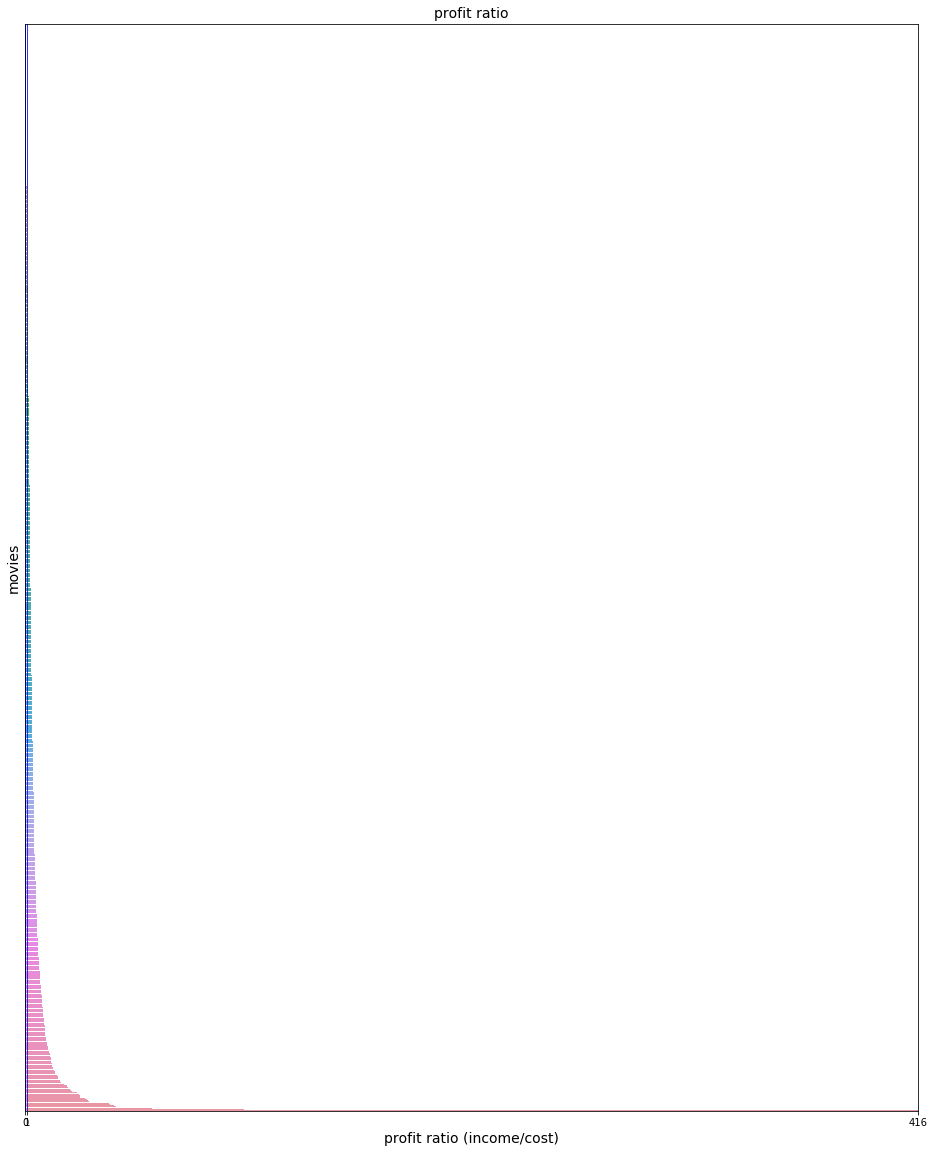

In [145]:
plt.figure(figsize =(16,20))
sns.barplot(x='profit_ratio',y='movie_and_date',data=df4)


plt.xlim(0,416)
plt.grid(zorder=0,color='b')
plt.yticks([])
plt.xticks([0,1,416])
plt.title("profit ratio", fontsize=14)
plt.xlabel("profit ratio (income/cost)", fontsize=14)
plt.ylabel("movies", fontsize=14)

## Outliers are making this diagram difficult to interpret
# Data Cleaning

In [146]:
df4.describe()

,id,production_budget,domestic_gross,worldwide_gross,index,runtime_minutes,profit,profit_ratio
count,1370.000000,1.370000e+03,1.370000e+03,1.370000e+03,1370.000000,1357.000000,1.370000e+03,1370.000000
mean,50.873723,4.906805e+07,6.254886e+07,1.566260e+08,33299.062774,108.285188,1.075580e+08,4.041509
std,28.640146,5.740899e+07,8.702606e+07,2.414072e+08,32615.354149,18.701518,2.000063e+08,12.547118
min,1.000000,2.700000e+04,3.880000e+02,5.280000e+02,54.000000,4.000000,-2.002376e+08,0.001056
25%,27.000000,1.000000e+07,8.224288e+06,1.705614e+07,7221.750000,96.000000,8.264382e+05,1.099364
50%,51.000000,2.800000e+07,3.445786e+07,6.531321e+07,20630.000000,106.000000,3.137213e+07,2.364489
75%,76.000000,6.100000e+07,7.573803e+07,1.767351e+08,52480.250000,118.000000,1.208044e+08,4.211902
max,100.000000,4.106000e+08,7.000596e+08,2.048134e+09,145937.000000,180.000000,1.748134e+09,416.564740


In [147]:
# outlier? profit_ratio = 416?
df4.tail()

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,profit,profit_ratio
776,Moonlight_2016,64,2016-10-21,Moonlight,1500000,27854931,65245512,2016,85930,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,63745512,43.497008
455,Get Out_2017,49,2017-02-24,Get Out,5000000,176040665,255367951,2017,87039,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",250367951,51.073590
840,Paranormal Activity 2_2010,65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,2010,8964,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,174512032,59.170677
1157,The Devil Inside_2012,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,2012,9487,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,100759490,101.759490
1196,The Gallows_2015,80,2015-07-10,The Gallows,100000,22764410,41656474,2015,35625,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",41556474,416.564740


In [148]:
df4.drop(index=[1157,1196],inplace = True)

Text(0, 0.5, 'movies')

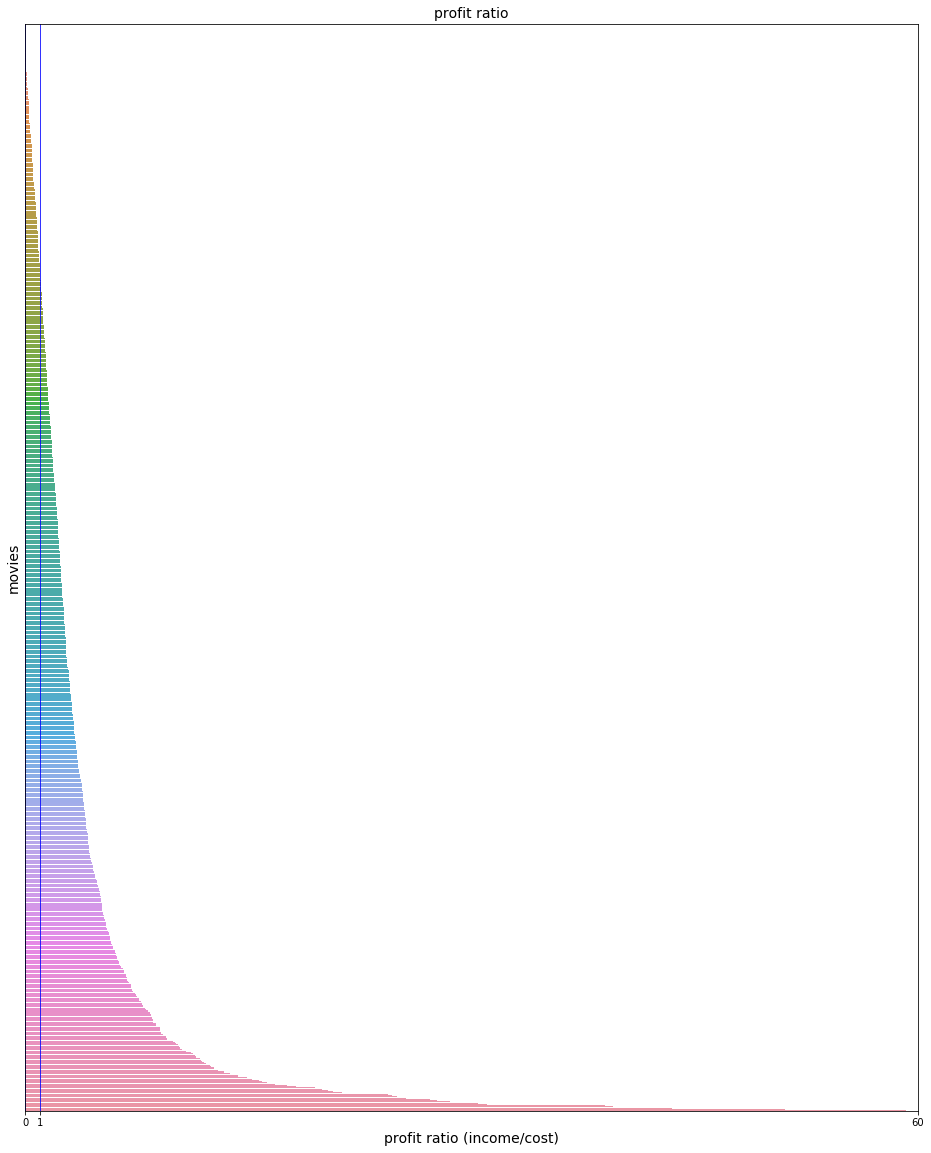

In [149]:
plt.figure(figsize =(16,20))
sns.barplot(x='profit_ratio',y='movie_and_date',data=df4)
plt.xlim(0,60)
plt.grid(zorder=0,color='b')
plt.yticks([])
plt.xticks([0,1,60])
plt.title("profit ratio", fontsize=14)
plt.xlabel("profit ratio (income/cost)", fontsize=14)
plt.ylabel("movies", fontsize=14)

In [150]:
profit_lmh = []
for profit_ratio in df4['profit_ratio']:
    if profit_ratio <1:
        profit_lmh.append('low')
    elif  profit_ratio <2:
        profit_lmh.append('medium')
    else:
        profit_lmh.append('high')
print(len(profit_lmh))
df4['profit_lmh'] = profit_lmh
df4

1368


,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,profit,profit_ratio,profit_lmh
520,Higher Power_2018,67,2018-05-11,Higher Power,500000,528,528,2018,49123,tt2924392,Higher Power,Higher Power,2018,93.0,"Action,Sci-Fi,Thriller",-499472,0.001056,low
1198,The Ghastly Love of Johnny X_2012,74,2012-10-26,The Ghastly Love of Johnny X,2000000,2436,2436,2012,16165,tt1754633,The Ghastly Love of Johnny X,The Ghastly Love of Johnny X,2012,106.0,"Comedy,Fantasy,Musical",-1997564,0.001218,low
2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,-11985384,0.001218,low
119,Area 51_2015,81,2015-05-15,Area 51,5000000,7556,7556,2015,8624,tt1519461,Area 51,Area 51,2015,91.0,"Horror,Sci-Fi,Thriller",-4992444,0.001511,low
434,Freaks of Nature_2015,83,2015-10-30,Freaks of Nature,33000000,70958,70958,2015,18716,tt1817771,Freaks of Nature,Freaks of Nature,2015,92.0,"Comedy,Horror,Sci-Fi",-32929042,0.002150,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,Paranormal Activity 3_2011,51,2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,2011,17175,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",202039844,41.407969,high
248,Chernobyl Diaries_2012,18,2012-05-25,Chernobyl Diaries,1000000,18119640,42411721,2012,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",41411721,42.411721,high
776,Moonlight_2016,64,2016-10-21,Moonlight,1500000,27854931,65245512,2016,85930,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,63745512,43.497008,high
455,Get Out_2017,49,2017-02-24,Get Out,5000000,176040665,255367951,2017,87039,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",250367951,51.073590,high


In [152]:
df4.reset_index(inplace=True)
df4

,level_0,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,profit,profit_ratio,profit_lmh
0,520,Higher Power_2018,67,2018-05-11,Higher Power,500000,528,528,2018,49123,tt2924392,Higher Power,Higher Power,2018,93.0,"Action,Sci-Fi,Thriller",-499472,0.001056,low
1,1198,The Ghastly Love of Johnny X_2012,74,2012-10-26,The Ghastly Love of Johnny X,2000000,2436,2436,2012,16165,tt1754633,The Ghastly Love of Johnny X,The Ghastly Love of Johnny X,2012,106.0,"Comedy,Fantasy,Musical",-1997564,0.001218,low
2,2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,-11985384,0.001218,low
3,119,Area 51_2015,81,2015-05-15,Area 51,5000000,7556,7556,2015,8624,tt1519461,Area 51,Area 51,2015,91.0,"Horror,Sci-Fi,Thriller",-4992444,0.001511,low
4,434,Freaks of Nature_2015,83,2015-10-30,Freaks of Nature,33000000,70958,70958,2015,18716,tt1817771,Freaks of Nature,Freaks of Nature,2015,92.0,"Comedy,Horror,Sci-Fi",-32929042,0.002150,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,841,Paranormal Activity 3_2011,51,2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,2011,17175,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",202039844,41.407969,high
1364,248,Chernobyl Diaries_2012,18,2012-05-25,Chernobyl Diaries,1000000,18119640,42411721,2012,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",41411721,42.411721,high
1365,776,Moonlight_2016,64,2016-10-21,Moonlight,1500000,27854931,65245512,2016,85930,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,63745512,43.497008,high
1366,455,Get Out_2017,49,2017-02-24,Get Out,5000000,176040665,255367951,2017,87039,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",250367951,51.073590,high


In [153]:
df4.drop(columns='level_0',inplace = True)

In [154]:
df4

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,profit,profit_ratio,profit_lmh
0,Higher Power_2018,67,2018-05-11,Higher Power,500000,528,528,2018,49123,tt2924392,Higher Power,Higher Power,2018,93.0,"Action,Sci-Fi,Thriller",-499472,0.001056,low
1,The Ghastly Love of Johnny X_2012,74,2012-10-26,The Ghastly Love of Johnny X,2000000,2436,2436,2012,16165,tt1754633,The Ghastly Love of Johnny X,The Ghastly Love of Johnny X,2012,106.0,"Comedy,Fantasy,Musical",-1997564,0.001218,low
2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,-11985384,0.001218,low
3,Area 51_2015,81,2015-05-15,Area 51,5000000,7556,7556,2015,8624,tt1519461,Area 51,Area 51,2015,91.0,"Horror,Sci-Fi,Thriller",-4992444,0.001511,low
4,Freaks of Nature_2015,83,2015-10-30,Freaks of Nature,33000000,70958,70958,2015,18716,tt1817771,Freaks of Nature,Freaks of Nature,2015,92.0,"Comedy,Horror,Sci-Fi",-32929042,0.002150,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Paranormal Activity 3_2011,51,2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,2011,17175,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",202039844,41.407969,high
1364,Chernobyl Diaries_2012,18,2012-05-25,Chernobyl Diaries,1000000,18119640,42411721,2012,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",41411721,42.411721,high
1365,Moonlight_2016,64,2016-10-21,Moonlight,1500000,27854931,65245512,2016,85930,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,63745512,43.497008,high
1366,Get Out_2017,49,2017-02-24,Get Out,5000000,176040665,255367951,2017,87039,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",250367951,51.073590,high


In [155]:
df4.to_csv('zippedData/df_profitRatio.csv')

# Let's analyze the correlation of the genre with the profit.

## Challenge: each movie has multiple genres. Need to be able to group by genre.

In [156]:
df5 = df4.copy()

# Data cleaning

In [157]:
# Do all cells have non-null data?
df5.isnull().any()

movie_and_date       False
id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
release_year         False
index                False
tconst               False
primary_title        False
original_title       False
start_year           False
runtime_minutes       True
genres                True
profit               False
profit_ratio         False
profit_lmh           False
dtype: bool

In [158]:
df5.loc[df5.genres.isnull() == True]

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,profit,profit_ratio,profit_lmh
116,Believe_2016,13,2016-12-02,Believe,3500000,890303,890303,2016,142202,tt9347476,Believe,Believe,2016,NaN,NaN,-2609697,0.254372,low
282,Robin Hood_2018,9,2018-11-21,Robin Hood,99000000,30824628,84747441,2018,115642,tt6858500,Robin Hood,Robin Hood,2018,NaN,NaN,-14252559,0.856035,low
845,The Bounty Hunter_2010,73,2010-03-19,The Bounty Hunter,45000000,67061228,135808837,2010,8014,tt1472211,The Bounty Hunter,The Bounty Hunter,2010,NaN,NaN,90808837,3.017974,high


In [159]:
# dropping 3 movies without genre information 
df5=df5.drop(index=[116,282,845])

In [160]:
# check
df5.loc[df5.genres.isnull() == True]

,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,profit,profit_ratio,profit_lmh


In [161]:
df5.shape

(1365, 18)

In [162]:
# first dump all genres in a list
l= list(df5.genres.unique())
print (l)
# split each elem accoring to ","
l2=''
for elem in l:
    l2=l2 + ',' + elem
list_genres_withduplicates = l2.split(',')
list_genres_withduplicates=list_genres_withduplicates[1:]
list_genres_withduplicates

['Action,Sci-Fi,Thriller', 'Comedy,Fantasy,Musical', 'Drama', 'Horror,Sci-Fi,Thriller', 'Comedy,Horror,Sci-Fi', 'Drama,Thriller', 'Action,Adventure', 'Action,Biography,Documentary', 'Mystery,Thriller', 'Horror,Thriller', 'Action,Comedy,Drama', 'Comedy', 'Drama,Music', 'Biography,Comedy,Drama', 'Comedy,Horror,Romance', 'Documentary', 'Crime,Thriller', 'Action,Drama,War', 'Comedy,Drama,Romance', 'Thriller', 'Comedy,Drama,Fantasy', 'Drama,Music,Thriller', 'Adventure,Drama', 'Drama,Mystery,Thriller', 'Drama,History,War', 'Action,Comedy,Crime', 'Crime,Drama,Thriller', 'Adventure,Horror,Sci-Fi', 'Drama,Thriller,Western', 'Action,Adventure,Comedy', 'Drama,Romance,War', 'Crime,Drama,Mystery', 'Action,Biography,Crime', 'Crime,Mystery,Thriller', 'Comedy,Drama', 'Drama,History,Thriller', 'Action,Crime,Drama', 'Horror', 'Biography,Documentary', 'Musical', 'Action,Drama', 'Biography,Crime,Drama', 'Drama,War', 'Biography,Drama,War', 'Biography,Drama,Sport', 'Comedy,Drama,Music', 'Drama,Horror,Thrill

['Action',
 'Sci-Fi',
 'Thriller',
 'Comedy',
 'Fantasy',
 'Musical',
 'Drama',
 'Horror',
 'Sci-Fi',
 'Thriller',
 'Comedy',
 'Horror',
 'Sci-Fi',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Action',
 'Biography',
 'Documentary',
 'Mystery',
 'Thriller',
 'Horror',
 'Thriller',
 'Action',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Music',
 'Biography',
 'Comedy',
 'Drama',
 'Comedy',
 'Horror',
 'Romance',
 'Documentary',
 'Crime',
 'Thriller',
 'Action',
 'Drama',
 'War',
 'Comedy',
 'Drama',
 'Romance',
 'Thriller',
 'Comedy',
 'Drama',
 'Fantasy',
 'Drama',
 'Music',
 'Thriller',
 'Adventure',
 'Drama',
 'Drama',
 'Mystery',
 'Thriller',
 'Drama',
 'History',
 'War',
 'Action',
 'Comedy',
 'Crime',
 'Crime',
 'Drama',
 'Thriller',
 'Adventure',
 'Horror',
 'Sci-Fi',
 'Drama',
 'Thriller',
 'Western',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Romance',
 'War',
 'Crime',
 'Drama',
 'Mystery',
 'Action',
 'Biography',
 'Crime',
 'Crime',
 'Mystery',
 'Thriller',
 'Comedy'

In [163]:
# then keep only one word for each unique genres
unique_genres=[]
for elem in list_genres_withduplicates:
    if elem not in unique_genres:
        unique_genres.append(elem)
unique_genres 

['Action',
 'Sci-Fi',
 'Thriller',
 'Comedy',
 'Fantasy',
 'Musical',
 'Drama',
 'Horror',
 'Adventure',
 'Biography',
 'Documentary',
 'Mystery',
 'Music',
 'Romance',
 'Crime',
 'War',
 'History',
 'Western',
 'Sport',
 'Animation',
 'Family']

In [164]:
# create columns for each genre to flag movie genre: Fill in with True if movie belongs to the genre 

for genre in unique_genres:
    l=[]
    for i in df5.index:
        if genre in df5['genres'][i]:
            l.append(True)
        else:
            l.append (False)
    df5[genre]=l

df5.iloc[9, 14:]

genres          Mystery,Thriller
profit                   -846744
profit_ratio          0.00383059
profit_lmh                   low
Action                     False
Sci-Fi                     False
Thriller                    True
Comedy                     False
Fantasy                    False
Musical                    False
Drama                      False
Horror                     False
Adventure                  False
Biography                  False
Documentary                False
Mystery                     True
Music                      False
Romance                    False
Crime                      False
War                        False
History                    False
Western                    False
Sport                      False
Animation                  False
Family                     False
Name: 9, dtype: object